# OSMOSE Heating coefficient

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [5]:
# Get data from OSMOSE dataset
file_path = '../../../DATA/OSMOSE_Dataset/OSMOSE_DATASET/load/heating_coeff/'
year = 2016
country_code = 'ES'
file_name = f'heating_coeff_{year}.csv'

In [6]:
data = pd.read_csv(file_path+file_name)
data_country = data[data['country']==country_code].set_index('timestamp')['heating_coeff']

In [9]:
data_FR = data[data['country']=='FR'].set_index('timestamp')['heating_coeff']
data_DK = data[data['country']=='DK'].set_index('timestamp')['heating_coeff']
data_GR = data[data['country']=='GR'].set_index('timestamp')['heating_coeff']

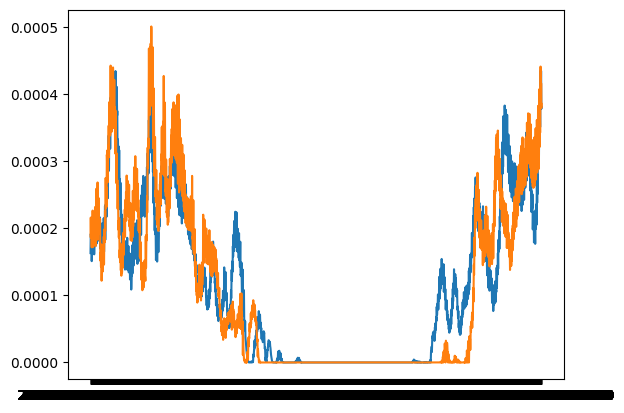

In [10]:
plt.plot(data_FR)
plt.plot(data_country)
plt.show()

In [11]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data_FR.index, y=data_FR, mode='lines', name='France'))
fig.add_trace(go.Scatter(x=data_FR.index, y=data_country, mode='lines', name='Spain'))
fig.add_trace(go.Scatter(x=data_DK.index, y=data_DK, mode='lines', name='Denmark'))
fig.add_trace(go.Scatter(x=data_FR.index, y=data_GR, mode='lines', name='Greece'))
fig.update_layout(title='Heating coefficient 2016',
                  xaxis_title='Date',
                  yaxis_title='Heating coefficient')


fig.show()

## Plot temperature and heating coefficient

In [ ]:
# récupérer les séries temporelles de température
temp_GR = pd.read_csv('temp_moy_Greece_2021.txt', header = None)
# temp_GR =temp_GR.to_numeric()
temp_GR.index = data_GR.index

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data_FR.index, y=data_GR, mode='lines', name='Greece'))
fig.add_trace(go.Scatter(x=data_FR.index, y=temp_GR[0], mode='lines', name='Temperature Greece', yaxis='y2'))

# Update layout for secondary y-axis
fig.update_layout(yaxis2=dict(title='Temperature', overlaying='y', side='right'))
fig.update_layout(title='Greece 2016/2021',
                  xaxis_title='Date',
                  yaxis_title='Heating coefficient')

fig.show()

In [1]:
from scipy.optimize import curve_fit
import numpy as np 
temperatures = np.array(data_GR)
heat_coefficient = np.array(temp_GR[0])
# Define piecewise linear function
def piecewise_linear(x, k1, k2, b1, b2):
    return np.piecewise(x, [x < 18, x >= 18], [lambda x: k1 * x + b1, lambda x: k2 * x + b2])

# Fit the piecewise linear function to the data
params, _ = curve_fit(piecewise_linear, temperatures, heat_coefficient)

# Extract the parameters
k1, k2, b1, b2 = params



NameError: name 'data_GR' is not defined

In [ ]:
def piecewise_linear_regression(temperatures, electricity_consumption):
    # Fit linear regression for temperatures below 18°C
    indices_below_18 = temperatures < 18
    X_below_18 = temperatures[indices_below_18]
    y_below_18 = electricity_consumption[indices_below_18]
    coefficients_below_18 = np.polyfit(X_below_18, y_below_18, 1)

    # Fit linear regression for temperatures above 22°C
    indices_above_22 = temperatures > 22
    X_above_22 = temperatures[indices_above_22]
    y_above_22 = electricity_consumption[indices_above_22]
    coefficients_above_22 = np.polyfit(X_above_22, y_above_22, 1)

    return coefficients_below_18, coefficients_above_22